In [1]:
from google.colab import files
uploaded = files.upload()


Saving housing (1).csv to housing (1).csv


In [5]:
import pandas as pd

# Replace 'your_file.csv' with the name of the file you just uploaded
df = pd.read_csv('housing (1).csv')
df.head()  # Display the first few rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Perform the describe and info steps

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [7]:
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats

Plot the histogram of each feature( Indicate what does histogram indicate on median_income and house_median_age)


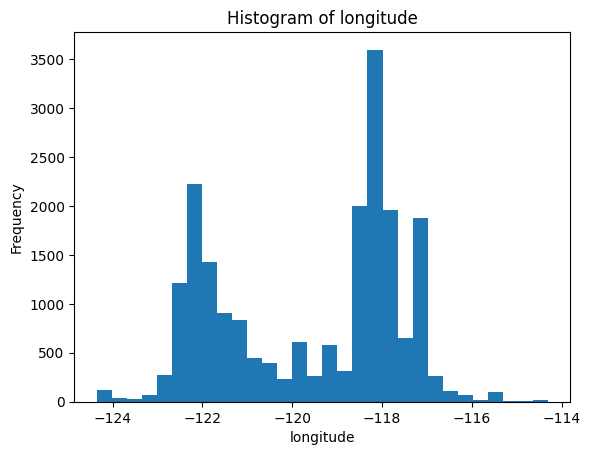

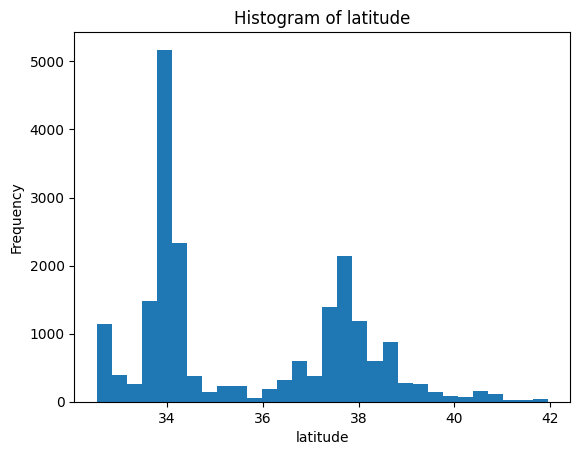

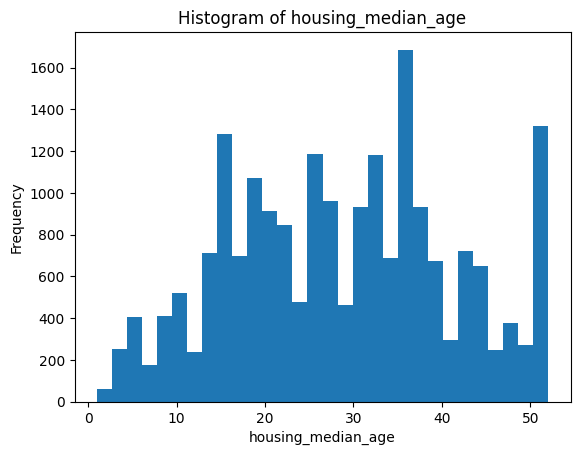

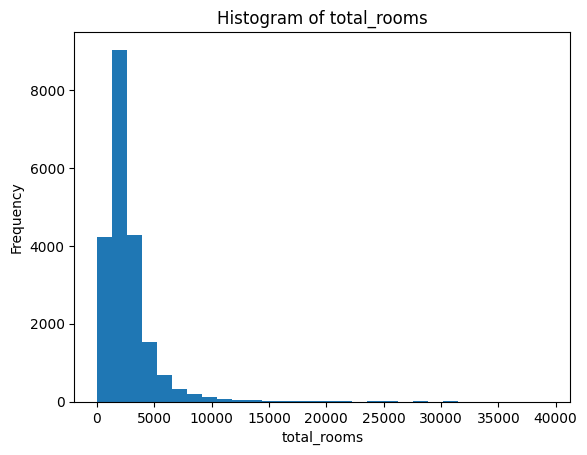

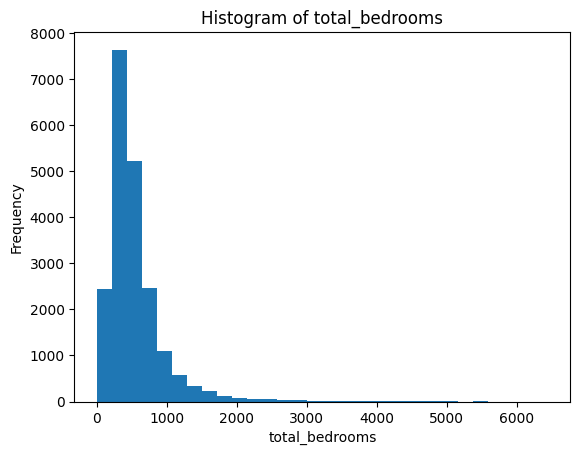

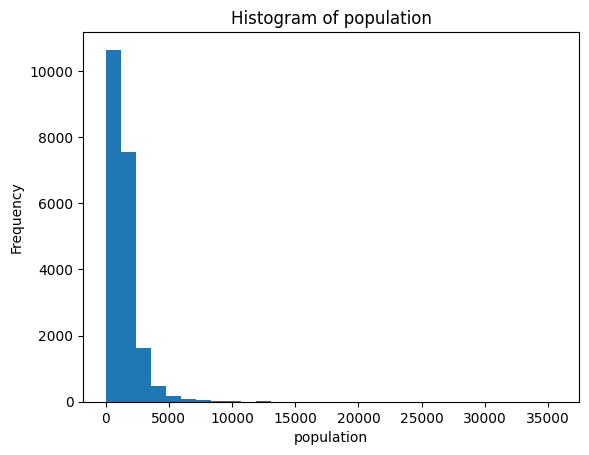

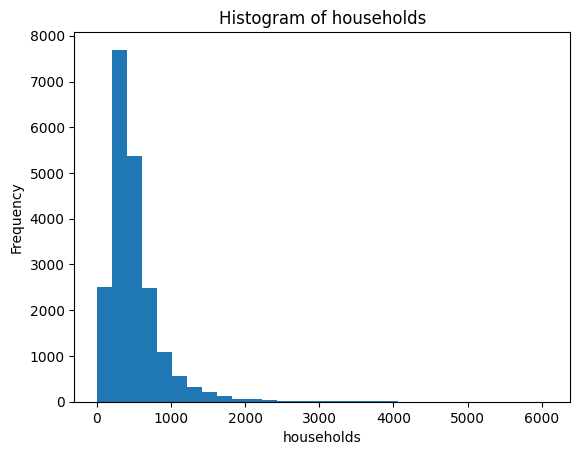

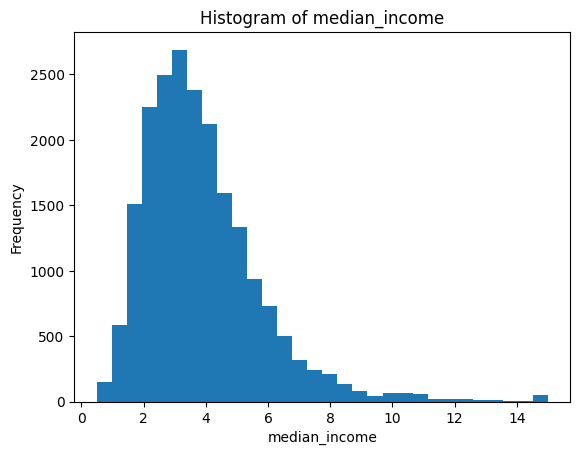

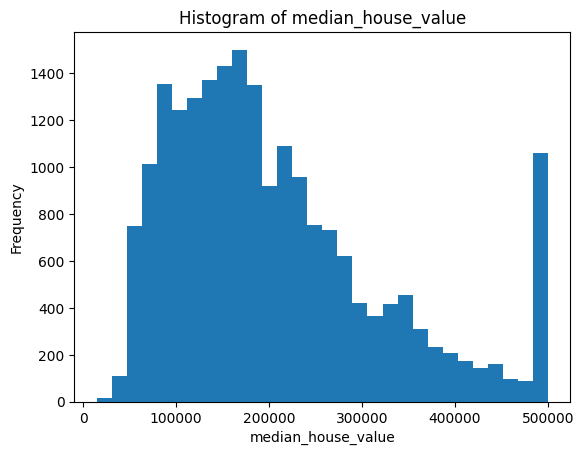


Interpretation of Histograms:
The histogram of median_income shows the distribution of median income values in the dataset.  A peak in a particular income range indicates a high concentration of households with incomes around that level.  The shape of the distribution can reveal whether incomes are skewed towards lower or higher values, which can be important for understanding the socioeconomic characteristics of the data.
The histogram of house_median_age shows the distribution of the median age of houses in different blocks.  The shape of the distribution may indicate trends in housing construction. For example, a concentration of houses in a certain age range could suggest a period of rapid development.


In [9]:
# Plot histograms for each numerical feature
for col in df.select_dtypes(include=np.number):
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()


Demonstrate the process of creating a test set( write the difference between random and stratified test set)


In [10]:

# Split data into training and testing sets
# Random sampling
train_set_random, test_set_random = train_test_split(df, test_size=0.2, random_state=42)

# Stratified sampling based on the median_house_value (you can choose a more appropriate column)
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

train_set_strat, test_set_strat = train_test_split(df, test_size=0.2, stratify=df["income_cat"], random_state=42)

# Remove the income_cat column
for set_ in (train_set_strat, test_set_strat):
    set_.drop("income_cat", axis=1, inplace=True)



 List the geographical features from the dataset  and plot a graph to Visualize Geographical Data(what does the graph indicate w.r.t housing prices and location)

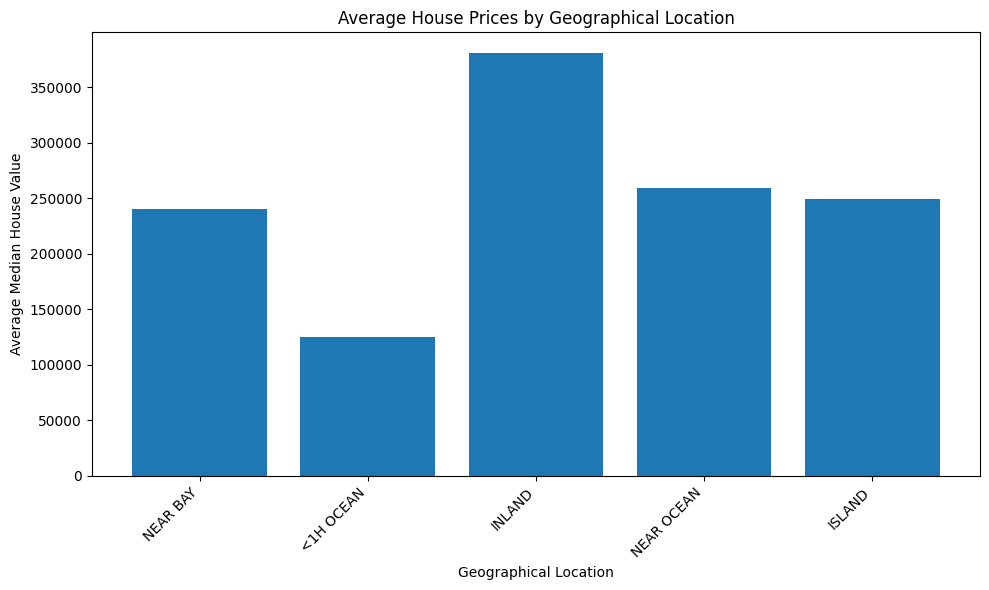


Interpretation of the Graph:
This bar plot visualizes the average median house value for different geographical locations specified by the 'ocean_proximity' feature.  The x-axis represents the various locations (e.g., near ocean, inland, etc.), and the y-axis shows the corresponding average house prices for each location.  The graph indicates how house prices vary depending on the proximity to the ocean or other geographical features. Locations with higher bars indicate higher average house prices.


In [11]:
import matplotlib.pyplot as plt

# Assuming 'ocean_proximity' represents geographical features
geographical_features = df['ocean_proximity'].unique()

# Calculate the average median house value for each geographical location
average_prices = df.groupby('ocean_proximity')['median_house_value'].mean()


# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(geographical_features, average_prices)
plt.xlabel("Geographical Location")
plt.ylabel("Average Median House Value")
plt.title("Average House Prices by Geographical Location")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



Plot a graph to show features correlation with housing price. Which feature corelates to the maximum.

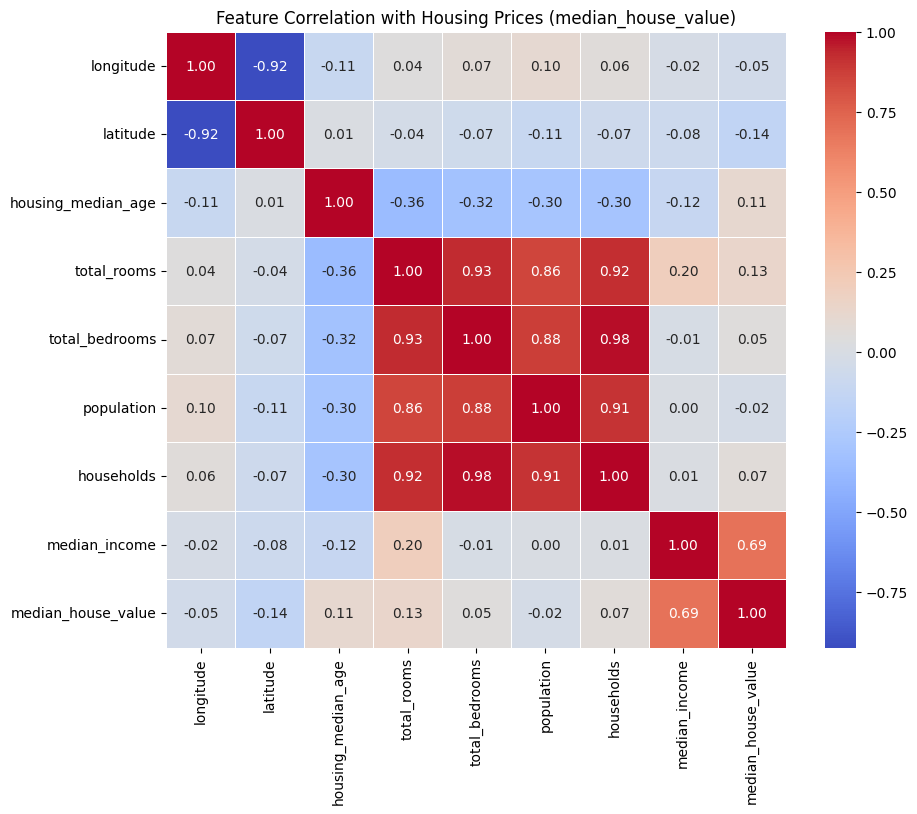

Feature most correlated with housing price: median_income (Correlation: 0.688)


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    housing_data = pd.read_csv('housing (1).csv')
except FileNotFoundError:
    print("Error: 'housing (1).csv' not found in the current directory. Please provide the correct path.")

    exit()

# Calculate the correlation matrix
correlation_matrix = housing_data.corr(numeric_only=True)

# Plot the heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation with Housing Prices (median_house_value)')
plt.show()

# Find the feature with the maximum correlation to housing price
correlation_with_price = correlation_matrix['median_house_value'].drop('median_house_value')
max_correlation_feature = correlation_with_price.idxmax()
max_correlation_value = correlation_with_price.max()

# Display the feature with the highest correlation
print(f"Feature most correlated with housing price: {max_correlation_feature} (Correlation: {max_correlation_value:.3f})")

Plot the graph for that with housing price and analyze what the graph indicate

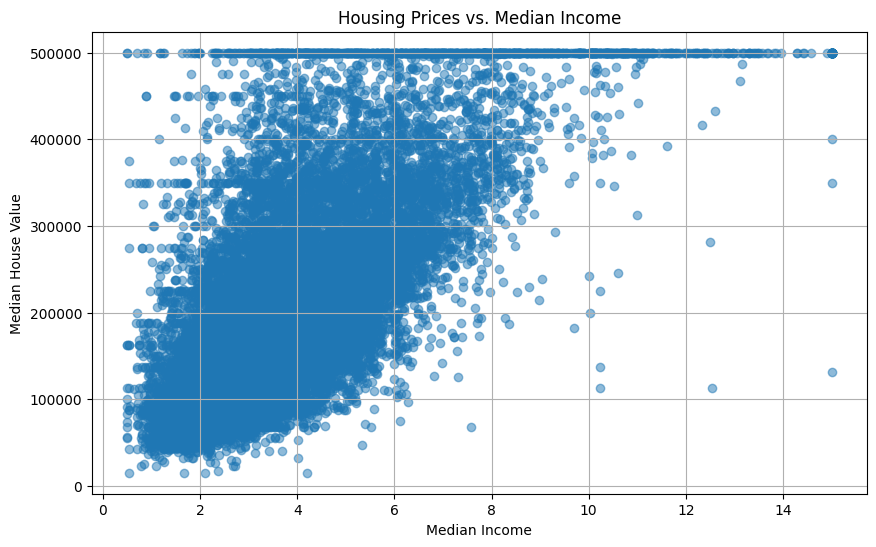


Analysis of Housing Prices vs. Median Income:
This scatter plot shows the relationship between median income and median house value. Generally, we expect to see a positive correlation, meaning that as median income increases, median house values also tend to increase. The plot can reveal the strength of this relationship and if there are any outliers or unusual patterns.  It's also important to consider potential confounding factors.


In [18]:
# Plotting Housing Prices vs. Median Income

plt.figure(figsize=(10, 6))
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.5)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Housing Prices vs. Median Income')
plt.grid(True)
plt.show()

# Analysis:
print("\nAnalysis of Housing Prices vs. Median Income:")
print("This scatter plot shows the relationship between median income and median house value. "
      "Generally, we expect to see a positive correlation, meaning that as median income increases, "
      "median house values also tend to increase. The plot can reveal the strength of this relationship "
      "and if there are any outliers or unusual patterns.  It's also important to consider potential confounding factors.")


List the features that could be combined to improve correlation and plot again to see if correlation has improved


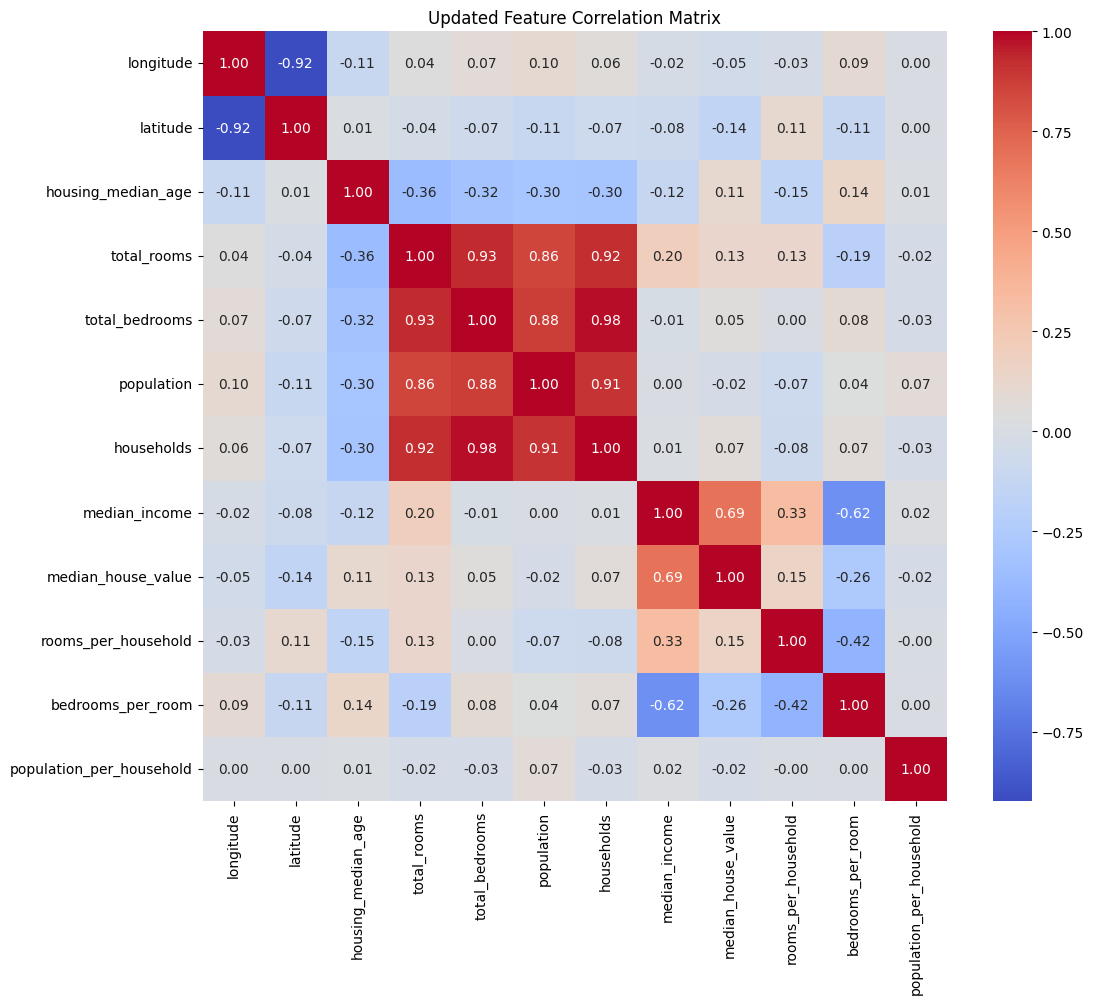

Feature most correlated with housing price (after combining features): median_income (Correlation: 0.688)


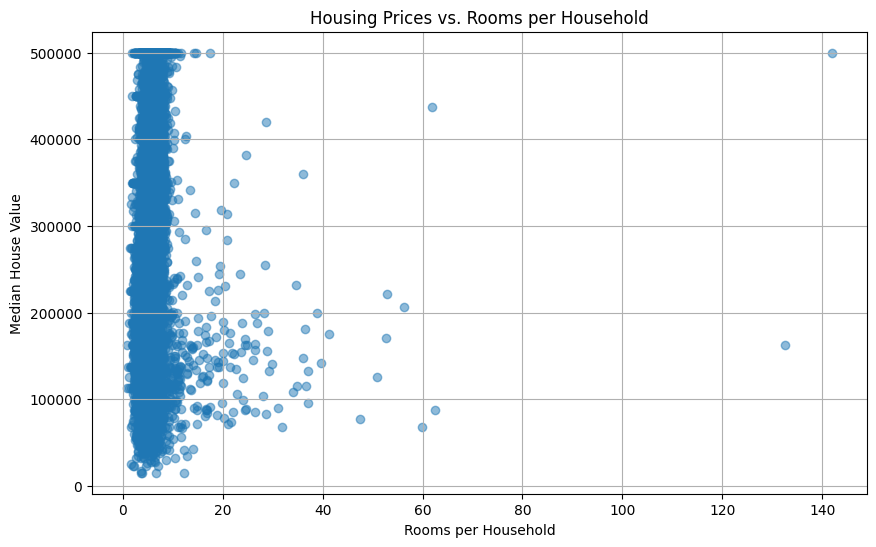

In [19]:

# Combine features to improve correlation
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

# Recalculate the correlation matrix with the new features
correlation_matrix = df.corr(numeric_only=True)

# Plot the updated heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Updated Feature Correlation Matrix')
plt.show()

# Find the feature with the maximum correlation to housing price (after combining)
correlation_with_price = correlation_matrix['median_house_value'].drop('median_house_value')
max_correlation_feature = correlation_with_price.idxmax()
max_correlation_value = correlation_with_price.max()
print(f"Feature most correlated with housing price (after combining features): {max_correlation_feature} (Correlation: {max_correlation_value:.3f})")

# Plot the graph for the new feature with housing price and analyze
plt.figure(figsize=(10, 6))
plt.scatter(df['rooms_per_household'], df['median_house_value'], alpha=0.5)
plt.xlabel('Rooms per Household')
plt.ylabel('Median House Value')
plt.title('Housing Prices vs. Rooms per Household')
plt.grid(True)
plt.show()



List the features that needs to be cleaned and demonstrate the process of cleaning

In [20]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
import seaborn as sns

uploaded = files.upload()

df = pd.read_csv('housing (1).csv')

# 1. Handling Missing Values
# Check for missing values
print(df.isnull().sum())

# Impute missing values in 'total_bedrooms' using the median
imputer = SimpleImputer(strategy="median")
df['total_bedrooms'] = imputer.fit_transform(df[['total_bedrooms']])

# 2. Encoding Categorical Features
# Encode 'ocean_proximity' using one-hot encoding
# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the 'ocean_proximity' column and transform it
encoded_features = encoder.fit_transform(df[['ocean_proximity']])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['ocean_proximity']))

# Concatenate the encoded DataFrame with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original 'ocean_proximity' column
df.drop('ocean_proximity', axis=1, inplace=True)


# 3. Feature Scaling (Example using StandardScaler)
# Scale numerical features using StandardScaler
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 4. Outlier Handling (Example using IQR)
# Calculate IQR for 'median_house_value'
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['median_house_value'] >= lower_bound) & (df['median_house_value'] <= upper_bound)]

# Display cleaned data
print(df.head())


Saving housing.csv to housing.csv
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.972476   
1  -1.322844  1.043185           -0.607019     2.045890        1.357143   
2  -1.332827  1.038503            1.856182    -0.535746       -0.827024   
3  -1.337818  1.038503            1.856182    -0.624215       -0.719723   
4  -1.337818  1.038503            1.856182    -0.462404       -0.612423   

   population  households  median_income  median_house_value  \
0   -0.974429   -0.977033       2.344766            2.129631   
1    0.861439    1.669961       2.332238            1.314156   
2   -0.820777   -0.843637       1.782699          

Is there any categorical data that needs to be converted to numerical? If so explain the method used to convert and code the same and show the output.

In [29]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the data
file_path = "housing.csv"
df = pd.read_csv(file_path)

# Check unique categories in 'ocean_proximity'
print("Unique categories in 'ocean_proximity':", df['ocean_proximity'].unique())

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Reshape and fit_transform the 'ocean_proximity' column
ocean_proximity_encoded = encoder.fit_transform(df[['ocean_proximity']])

# Convert to DataFrame for better visualization
encoded_df = pd.DataFrame(ocean_proximity_encoded,
                          columns=encoder.get_feature_names_out(['ocean_proximity']))

# Add encoded columns back to original DataFrame (optional)
df = pd.concat([df, encoded_df], axis=1)
df.drop('ocean_proximity', axis=1, inplace=True)
# Display the first 5 rows of the transformed data
print(df.head())



Unique categories in 'ocean_proximity': ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximit

Design a pipeline inculcating (Custom transform, feature scaling and encoding). Explain how it works

In [30]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Load dataset (replace 'df' with your housing dataframe)
# Assuming the dataset file is in the current working directory
file_path = "housing (1).csv"  # Replace with the correct path if needed
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found. Please provide the correct path.")
    exit()

# Indices for feature engineering (assuming these are the correct column indices)
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# Custom transformer for adding new attributes
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Separate numerical and categorical attributes
num_attribs = df.drop('ocean_proximity', axis=1).columns.tolist()
cat_attribs = ["ocean_proximity"]

# Numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

# Full pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

# Apply the pipeline
housing_prepared = full_pipeline.fit_transform(df)

# Show result
print("Transformed housing data shape:", housing_prepared.shape)

Transformed housing data shape: (20640, 17)
